In [ ]:
## Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Import the dataset
path=("/content/drive/MyDrive/Data Science/Red Wine Quality/winequality-red.csv")
df=pd.read_csv(path)

In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
## Detail of the datasate
print("Summary statistics")
print(df.describe())

Summary statistics
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
## Since there are no null values we can go ahead with the EDA

<ipython-input-4-3a011e37dda4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='flare')


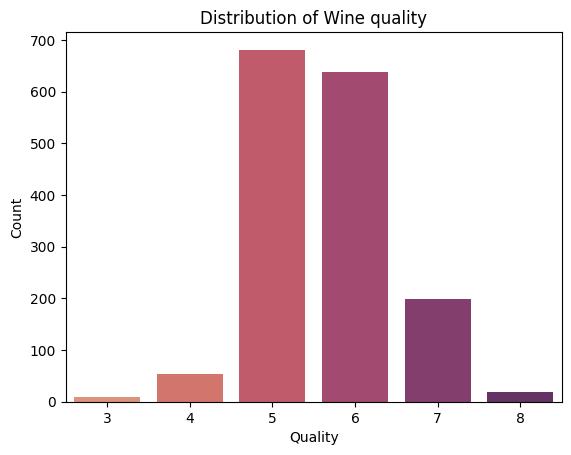

In [ ]:
### Data visualisation
# 1. Univariate Analysis

# Countplot of quality of wine
sns.countplot(x='quality', data=df, palette='flare')
plt.title('Distribution of Wine quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

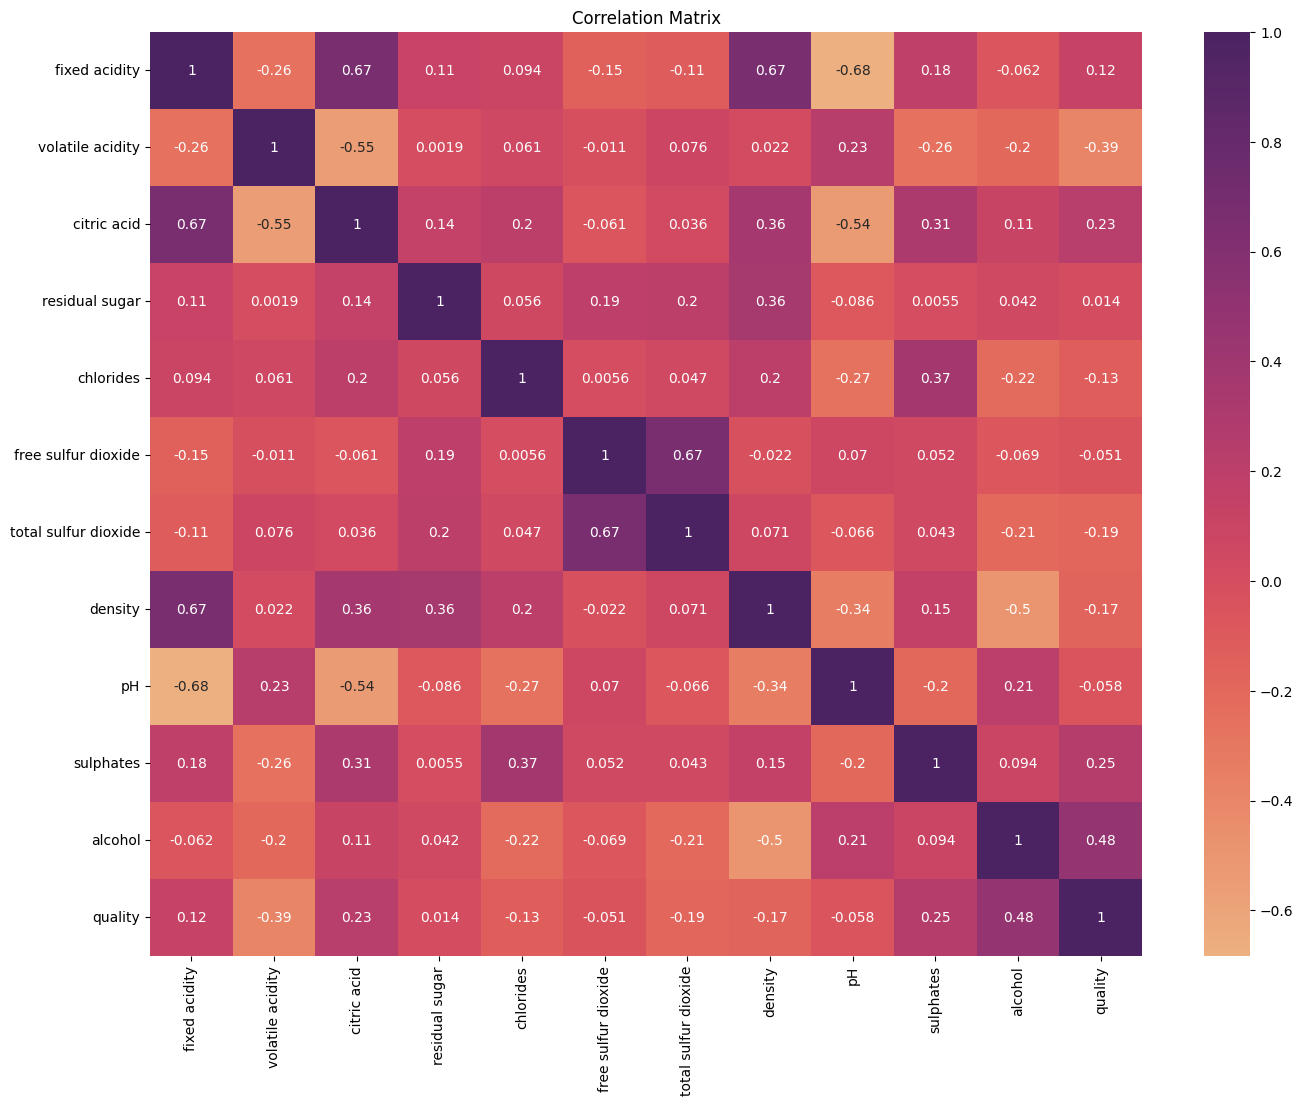

In [ ]:
# Correlation matrix
plt.figure(figsize=(16, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='flare')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Acidity and density are correlated
# Fixed acidity correlated to citric acid and density.
# Fixed acidity is negatively correlated to pH.
# Citric acid and volatice acidity are negatively correlated.
# Obvious - total sulfur dioxide and free sulfur dioxide are correlated.

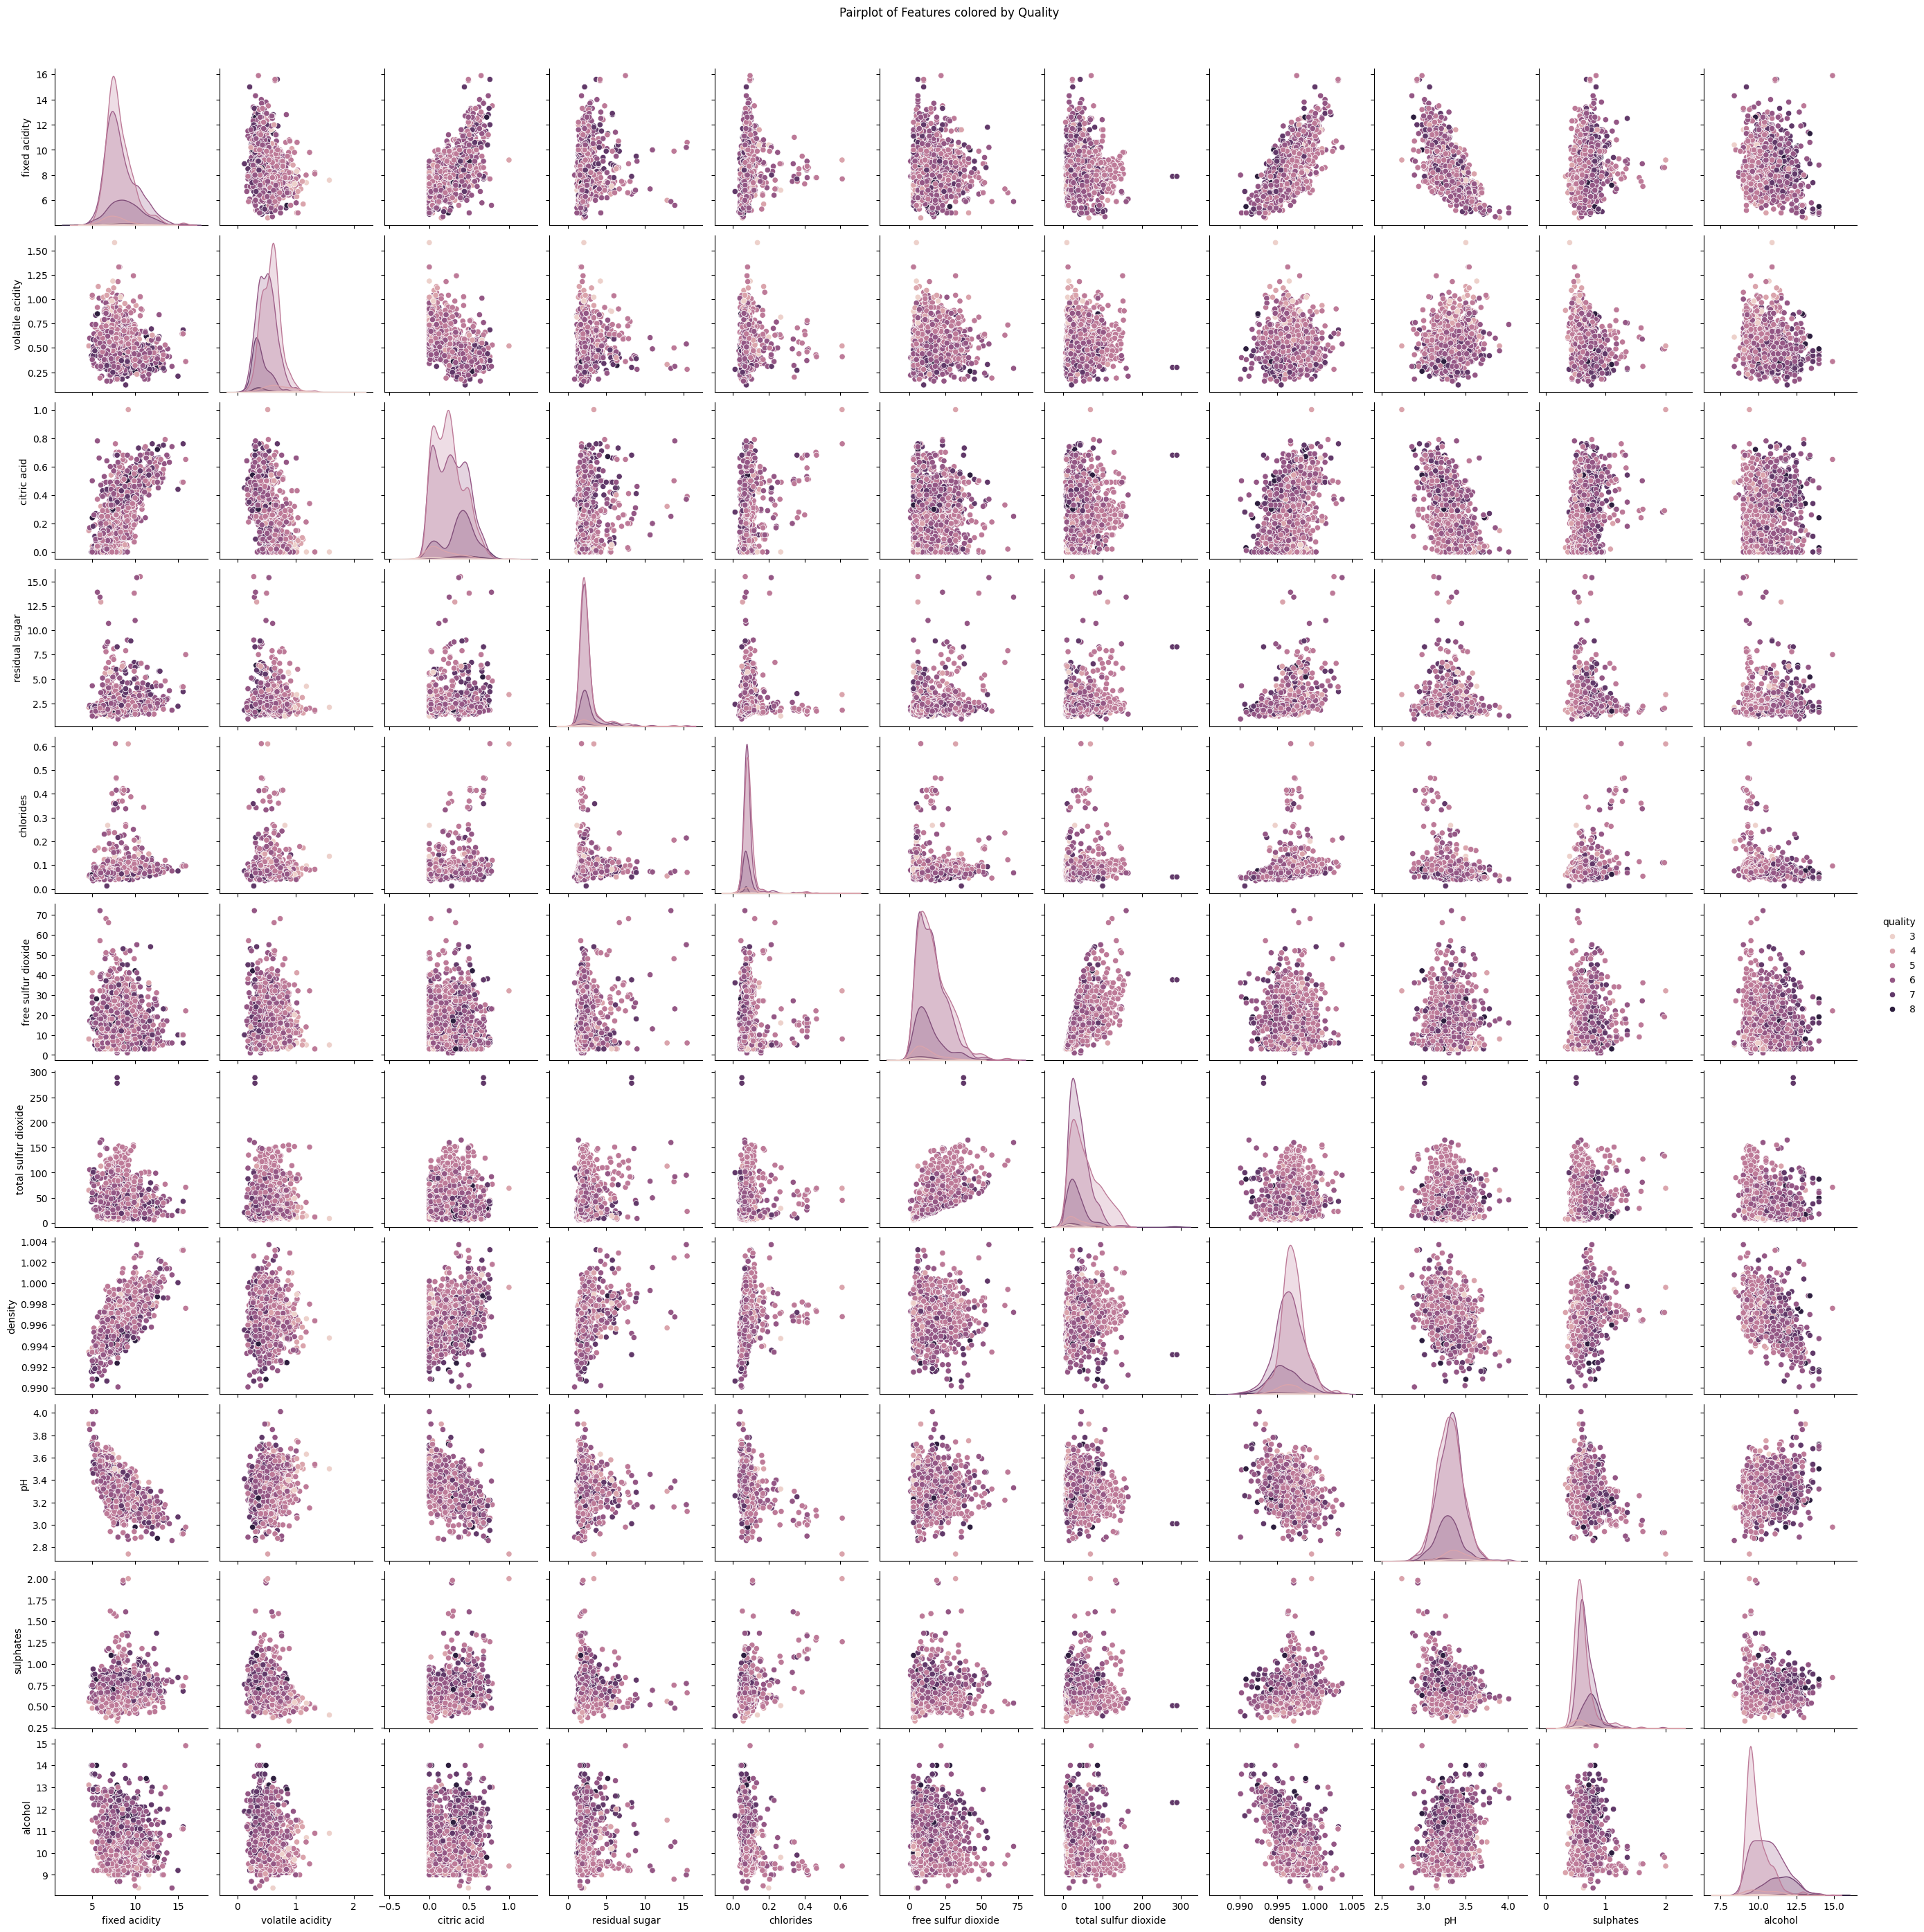

In [ ]:
## Details to see quality of wine other charecters using pairplot
sns.pairplot(df, hue='quality')
plt.suptitle('Pairplot of Features colored by Quality', y=1.02)
plt.show()


<ipython-input-6-d16212df49e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='flare')


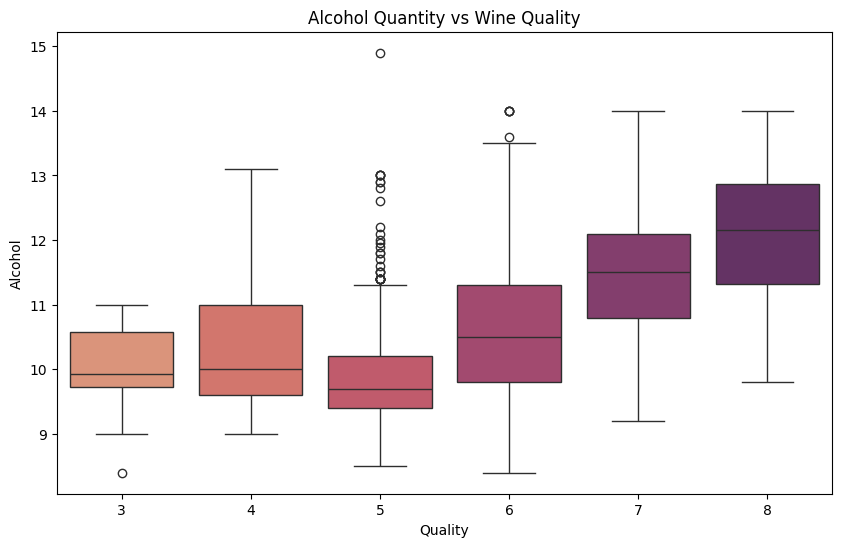

In [ ]:
## Alcohol quantity vs wine quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df, palette='flare')
plt.title('Alcohol Quantity vs Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()


In [ ]:
# It is seen with higher alcohol content the quality of wine increases however there are few outliers as well when the quality of alcohol ranges between 5 and 6.


<ipython-input-7-814c3d4394dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='pH', data=df, palette='flare')


Text(0, 0.5, 'pH')

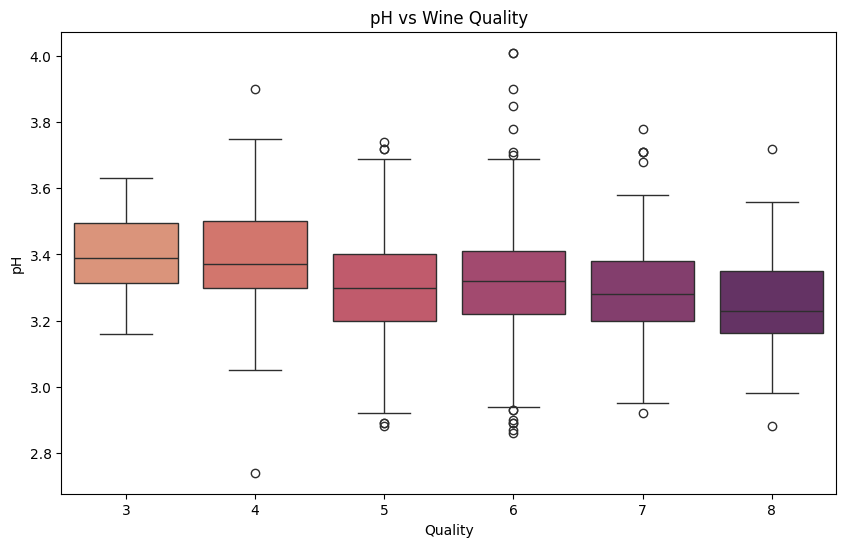

In [ ]:
## pH vs wine quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='pH', data=df, palette='flare')
plt.title('pH vs Wine Quality')
plt.xlabel('Quality')
plt.ylabel('pH')

In [ ]:
# trend shows more acidic the drink better the quality of wine, however there are also outliers, especially when the quality of wine is 6.

## Machine Learning

# Load the Library for Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the Library for Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Load the Library for Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Pre-processing Steps for Machine Learning
# Load the Library for Model Evaluation

X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [ ]:
# Models List
models = [LogisticRegression, KNeighborsClassifier, GaussianNB]

# Training
for model in models:
  model = model()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(model)
  print(classification_report(y_test, y_pred))


LogisticRegression()
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.60      0.66      0.63       131
           6       0.47      0.63      0.54       131
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00         5

    accuracy                           0.53       320
   macro avg       0.18      0.22      0.20       320
weighted avg       0.44      0.53      0.48       320

KNeighborsClassifier()
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.55      0.61      0.58       131
           6       0.48      0.50      0.49       131
           7       0.32      0.31      0.32        39
           8       0.00      0.00      0.00         5

    accuracy                     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
### Using different approach

# Prepare the data
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable

# Convert to binary classification: Good (6-8) vs Bad (3-5)
y = (y >= 7).astype(int)

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Label encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [ ]:
# Models List
models = [LogisticRegression, KNeighborsClassifier, GaussianNB]

# Training
for model in models:
  model = model()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(model)
  print(classification_report(y_test, y_pred))

LogisticRegression()
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.62      0.21      0.32        47

    accuracy                           0.87       320
   macro avg       0.75      0.60      0.62       320
weighted avg       0.84      0.87      0.84       320

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.53      0.21      0.30        47

    accuracy                           0.86       320
   macro avg       0.70      0.59      0.61       320
weighted avg       0.83      0.86      0.83       320

GaussianNB()
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       273
           1       0.50      0.79      0.61        47

    accuracy                           0.85       320
   macro avg       0.73      0.83      0.76       320
weighted avg     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
### ### Using 3rd approach

# Prepare the data
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable

# Convert to binary classification: Good (6-8) vs Bad (3-5)
y = (y >= 8).astype(int)

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Label encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Models List
models = [LogisticRegression, KNeighborsClassifier, GaussianNB]

# Training
for model in models:
  model = model()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(model)
  print(classification_report(y_test, y_pred))


LogisticRegression()
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.62      0.21      0.32        47

    accuracy                           0.87       320
   macro avg       0.75      0.60      0.62       320
weighted avg       0.84      0.87      0.84       320

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.53      0.21      0.30        47

    accuracy                           0.86       320
   macro avg       0.70      0.59      0.61       320
weighted avg       0.83      0.86      0.83       320

GaussianNB()
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       273
           1       0.50      0.79      0.61        47

    accuracy                           0.85       320
   macro avg       0.73      0.83      0.76       320
weighted avg     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
### We can see by traing the model in different scenarios where Quality of wine is bundled >=8 and the rest, >=7 and the rest and also for each value. We can infer that when quality of wine is taken >= 8 the data shows best accuracy and precision than the rest of the other scenarios.